# Conserved TADs identified in Method_3 npb_x_conserved.txt

In [ ]:
#assigning TADs to 5 conservation groups

In [ ]:
I assigned TADs to 5 groups, based on the number of species each TAD is conserved in
I did pairwise NPB-X comparisons to assess conservation of at least 50%
1. NPB specific
2. Japonica specific (NPB+az)
3. NPB+az+ruf
4. NPB+az+tuf+IR64
5. NPB+az+ruf+IR64+omer

In [28]:
!awk '{print $0"\t0"}' NPB_TADs.bed > tmp && mv tmp NPB_TADs.bed

In [32]:
#identify tads shared npb-az
import os
os.chdir('/scratch/ak8725/blast/')

# Initialize a set to store the common TAD coordinates
common_tads = set()

# Read the npb_az_conserved.bed file to extract coordinates
with open("./Method_3/npb_omer_conserved.bed", "r") as common_file:
    for line in common_file:
        fields = line.strip().split("\t")
        coordinates = tuple(fields[:3])
        common_tads.add(coordinates)

# Initialize a counter to keep track of incremented values
count = 0

# Read the NPB_TADs_5kb_two_tools_80.bed file and create a temporary list to store updated lines
updated_lines = []

with open("NPB_TADs.bed", "r") as npb_file:
    for line in npb_file:
        fields = line.strip().split("\t")
        if len(fields) >= 4:
            coordinates = tuple(fields[:3])
            if coordinates in common_tads:
                # Check if the coordinates are in common_tads
                # If found, increment col4 by 1 and update the line
                fields[3] = str(int(fields[3]) + 1)
                count += 1
            updated_lines.append("\t".join(fields))

# Write the updated lines back to the NPB_TADs_5kb_two_tools_80.bed file
with open("NPB_TADs.bed", "w") as npb_file:
    npb_file.writelines("\n".join(updated_lines))

print(f"Number of col4 values incremented by 1: {count}")

Number of col4 values incremented by 1: 391


In [ ]:
#Now I have a list of TADs ranked by their conservation status in NPB_TADs_ranked.bed

In [33]:
#creating .bed files with NPB TAD groups
import os
os.chdir('/scratch/ak8725/blast/')
# Define the input file
input_file = "NPB_TADs_ranked.bed"

# Create a dictionary to store the output file handles
output_files = {}

# Open the input file and read its lines
with open(input_file, "r") as infile:
    for line in infile:
        parts = line.strip().split("\t")
        if len(parts) == 4:
            # Extract the number from the last column
            number = int(parts[3])
            
            # Define the output file name based on the number
            output_file_name = f"NPB_TADs_{number}.bed"
            
            # Check if the output file for this number already exists in the dictionary
            # If not, create a new file and add it to the dictionary
            if number not in output_files:
                output_files[number] = open(output_file_name, "w")
            
            # Write the line to the corresponding output file
            output_files[number].write(line)

# Close all output files
for file in output_files.values():
    file.close()

In [34]:
!wc -l NPB_TADs_1.bed
!wc -l NPB_TADs_2.bed
!wc -l NPB_TADs_3.bed
!wc -l NPB_TADs_4.bed
!wc -l NPB_TADs_5.bed

338 NPB_TADs_0.bed
487 NPB_TADs_1.bed
380 NPB_TADs_2.bed
173 NPB_TADs_3.bed
46 NPB_TADs_4.bed


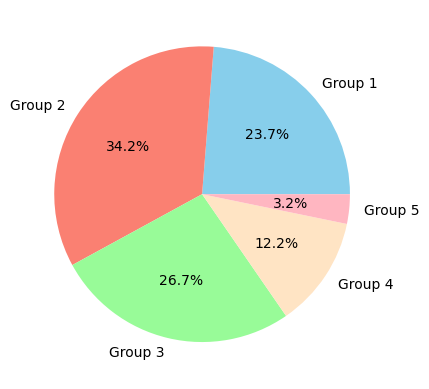

In [9]:
#TAD conservation groups (blast-based approach)
import matplotlib.pyplot as plt

# Example data
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
sizes = [23.76, 34.24, 26.68, 12.17, 3.23]

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['skyblue', 'salmon', 'palegreen', 'bisque', 'lightpink'])

# Add title
#ax.set_title("BLAST-based approach")

plt.savefig("/scratch/ak8725/figs/fig8A.pdf")

# Show the plot
plt.show()

In [ ]:
#for comparison: liftover results
643 NPB_TADs_1.bed
438 NPB_TADs_2.bed
221 NPB_TADs_3.bed
98 NPB_TADs_4.bed
24 NPB_TADs_5.bed

# Comparing genetic and epigenetic features between TAD conservation groups

### TAD length

Kruskal-Wallis Test Statistic: 36.68010383066775
P-value: 2.0964006751465044e-07
There is a significant difference between groups.
Group 1: Mean = 76804.73372781066, Median = 65000.0
Group 2: Mean = 72366.52977412731, Median = 65000.0
Group 3: Mean = 64488.188976377955, Median = 60000.0
Group 4: Mean = 60505.78034682081, Median = 55000.0
Group 5: Mean = 60760.86956521739, Median = 55000.0


/home/ak8725/.local/lib/python3.8/site-packages/scikit_posthocs/_posthocs.py:339: RuntimeWarning: divide by zero encountered in true_divide
  B = (1. / x_lens.loc[i] + 1. / x_lens.loc[j])


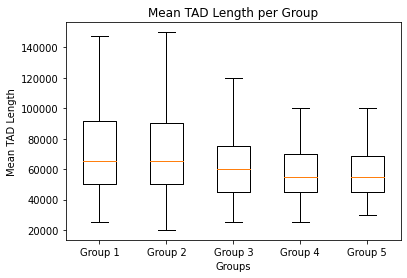

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

# Initialize an empty dictionary to store TAD lengths for each group
tad_lengths = {}

# Process all five input files
for x in range(1, 6):
    filename = f"NPB_TADs_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "ignore_col"])

    # Calculate TAD lengths for the current group (omit the 'ignore_col' column)
    group_name = f"Group {x}"
    tad_lengths[group_name] = df["end_tad"] - df["start_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*tad_lengths.values())

# Print Kruskal-Wallis test results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (you may need to adjust the significance level)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between groups.")
    # Perform pairwise post hoc tests (Dunn's test for multiple comparisons)

    # Create a dataframe for post hoc analysis using tad_lengths dictionary
    df_posthoc = pd.DataFrame(tad_lengths)

    # Perform Dunn's test for multiple comparisons
    posthoc_results = posthoc_dunn(df_posthoc, val_col=df_posthoc.columns[0], group_col=df_posthoc.columns[1])

    # Print mean/median TAD length per group
    for group_name, lengths in tad_lengths.items():
        print(f"{group_name}: Mean = {lengths.mean()}, Median = {lengths.median()}")
else:
    print("No significant difference between groups.")

# Create vertical boxplots with outliers not shown
plt.boxplot(tad_lengths.values(), vert=True, showfliers=False)
plt.xlabel("Groups")
plt.xticks(range(1, 6), tad_lengths.keys())
plt.ylabel("Mean TAD Length")
plt.title("Mean TAD Length per Group")
plt.show()

Kruskal-Wallis Test Statistic: 36.68010383066775
P-value: 2.0964006751465044e-07
There is a significant difference between groups.
P-value for 1 vs. 2: 0.7456
P-value for 1 vs. 3: 0.0003
P-value for 1 vs. 4: 0.0000
P-value for 1 vs. 5: 0.0185
P-value for 2 vs. 3: 0.0001
P-value for 2 vs. 4: 0.0000
P-value for 2 vs. 5: 0.0105
P-value for 3 vs. 4: 0.2205
P-value for 3 vs. 5: 0.4337
P-value for 4 vs. 5: 0.9572
Adjusted P-values and Significance Groups for Pairwise Comparisons:
2 vs. 2: Adjusted P-Value=0.0001, Significance Group=a
1 vs. 3: Adjusted P-Value=0.0002, Significance Group=b
2 vs. 1: Adjusted P-Value=0.0002, Significance Group=c
1 vs. 2: Adjusted P-Value=0.0007, Significance Group=d
2 vs. 3: Adjusted P-Value=0.0210, Significance Group=e
1 vs. 4: Adjusted P-Value=0.0308, Significance Group=f
2 vs. 4: Adjusted P-Value=0.3151, Significance Group=g
3 vs. 1: Adjusted P-Value=0.5421, Significance Group=g
1 vs. 1: Adjusted P-Value=0.8285, Significance Group=g
3 vs. 2: Adjusted P-Value=

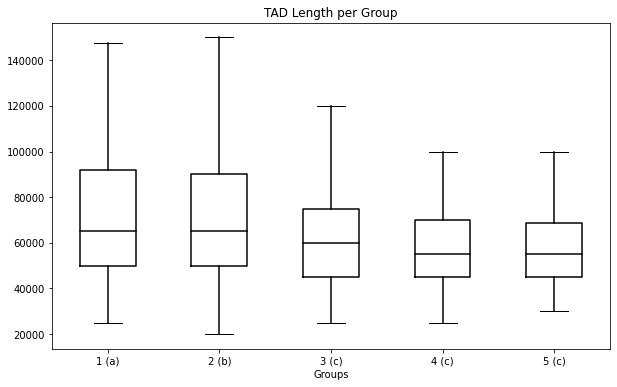

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal, ranksums
from statsmodels.stats.multitest import multipletests

# Initialize an empty dictionary to store TAD lengths for each group
tad_lengths = {}

# Process all five input files
for x in range(1, 6):
    filename = f"NPB_TADs_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "ignore_col"])

    # Calculate TAD lengths for the current group (omit the 'ignore_col' column)
    group_name = f"{x}"
    tad_lengths[group_name] = df["end_tad"] - df["start_tad"]

    significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*tad_lengths.values())

# Print Kruskal-Wallis test results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (you may need to adjust the significance level)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between groups.")

    # Perform pairwise Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = list(tad_lengths.keys())[i]
            group2_name = list(tad_lengths.keys())[j]
            group1 = tad_lengths[group1_name]
            group2 = tad_lengths[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"{list(tad_lengths.keys())[idx // 4]} vs. {list(tad_lengths.keys())[idx % 4]}"
        significance_mapping[comparison] = current_group
        if adjusted_p < 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"{list(tad_lengths.keys())[idx // 4]} vs. {list(tad_lengths.keys())[idx % 4]}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

    # Create vertical boxplots with black lines on white background
    plt.figure(figsize=(10, 6))
    boxprops = dict(linewidth=1.5, color="black")
    medianprops = dict(linewidth=1.5, color="black")
    capprops = dict(linewidth=1.5, color="black")
    whiskerprops = dict(linewidth=1.5, color="black")

    
    plt.boxplot(tad_lengths.values(), vert=True, showfliers=False, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
    plt.xlabel("Groups")
    plt.xticks(range(1, 6), group_labels)
    plt.title("TAD Length per Group")
    plt.savefig("tad_length_groups.png", dpi=300)
    plt.show()

else:
    print("No significant difference between groups.")

### Gene expression

In [1]:
import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../expression/Nip_field2016_Normal.bed"

    # Load the BED files into BedTool objects
    npb_tads = pybedtools.BedTool(npb_tads_path)
    exp_data = pybedtools.BedTool(exp_data_path)

    # Perform a "coverage" operation to associate expression values with TADs
    # The -mean option calculates the mean of the scores (expression values) in the overlapping regions
    result = npb_tads.coverage(exp_data, mean=True)

    # Create a list to store the results
    results = []

    # Iterate through the result and calculate the mean expression per TAD
    for interval in result:
        chrom_tad = interval.chrom
        start_tad = interval.start
        end_tad = interval.end
        mean_exp = float(interval.fields[4]) if interval.fields[4] != "." else 0.0  # Handle missing values
        results.append((chrom_tad, start_tad, end_tad, mean_exp))

    # Write the results to the exp_x.bed file
    output_file = f"exp_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2016_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

****

In [3]:
import pandas as pd
from scipy.stats import kruskal

# Load the data from all five files into a single DataFrame
data = {}
for group in range(1, 6):
    filename = f"exp_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "number_of_genes"])
    data[f"group_{group}"] = df["number_of_genes"]  # Extract the number_of_genes column

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Perform the Kruskal-Wallis test on the "number_of_genes" column
statistic, p_value = kruskal(df["group_1"], df["group_2"], df["group_3"], df["group_4"], df["group_5"])

# Check the p-value for significance
if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
    print("There are significant differences in gene expression between the groups.")
else:
    print("No significant differences in gene expression  between the groups.")

No significant differences in gene expression  between the groups.


### Number of genes per TAD

In [2]:
import pandas as pd
from scipy.stats import kruskal

# Load the data from all five files into a single DataFrame
data = {}
for group in range(0, 5):
    filename = f"exp_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "number_of_genes"])
    data[f"group_{group}"] = df["number_of_genes"]  # Extract the number_of_genes column

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Perform the Kruskal-Wallis test on the "number_of_genes" column
statistic, p_value = kruskal(df["group_0"], df["group_1"], df["group_2"], df["group_3"], df["group_4"])

# Check the p-value for significance
if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
    print("There are significant differences in the number of genes per TAD between the groups.")
else:
    print("No significant differences in the number of genes per TAD between the groups.")

No significant differences in the number of genes per TAD between the groups.


### Gene coverage per 500bp

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_genes_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"genes_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-45281168/pybedtools.37zgijm_.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-45281168/pybedtools.37zgijm_.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-45281168/pybedtools.tqqje08q.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-45281168/pybedtools.tqqje08q.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-45281168/pybedtools.gt6tlxcw.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-45281168/pybedtools.gt6tlxcw.tmp has a record wh

In [32]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"genes_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_exp_per_tad"])
    data[f"genes_{x}"] = df["mean_exp_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["genes_1"], data["genes_2"], data["genes_3"], data["genes_4"], data["genes_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (exp_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"genes_{i+1}"
            group2_name = f"genes_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"genes_{idx // 4 + 1} vs. genes_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"genes_{idx // 4 + 1} vs. genes_{idx % 4 + 2}"
        group1_name = f"genes_{idx // 4 + 1}"
        group2_name = f"genes_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (exp_x.bed files).
P-value for genes_1 vs. genes_2: 0.0059
P-value for genes_1 vs. genes_3: 0.0000
P-value for genes_1 vs. genes_4: 0.0004
P-value for genes_1 vs. genes_5: 0.0047
P-value for genes_2 vs. genes_3: 0.0682
P-value for genes_2 vs. genes_4: 0.1155
P-value for genes_2 vs. genes_5: 0.0841
P-value for genes_3 vs. genes_4: 0.8101
P-value for genes_3 vs. genes_5: 0.4010
P-value for genes_4 vs. genes_5: 0.4477
Adjusted P-values and Significance Groups for Pairwise Comparisons:
genes_1 vs. genes_3: Adjusted P-Value=0.0003, Significance Group=a
genes_1 vs. genes_4: Adjusted P-Value=0.0020, Significance Group=a
genes_1 vs. genes_2: Adjusted P-Value=0.0148, Significance Group=a
genes_1 vs. genes_5: Adjusted P-Value=0.0148, Significance Group=a
genes_2 vs. genes_2: Adjusted P-Value=0.1365, Significance Group=a
genes_2 vs. genes_4: Adjusted P-Value=0.1402, Significance Group=b
genes_2 vs. genes_3: Adjusted P-Value=0.1650, Significance

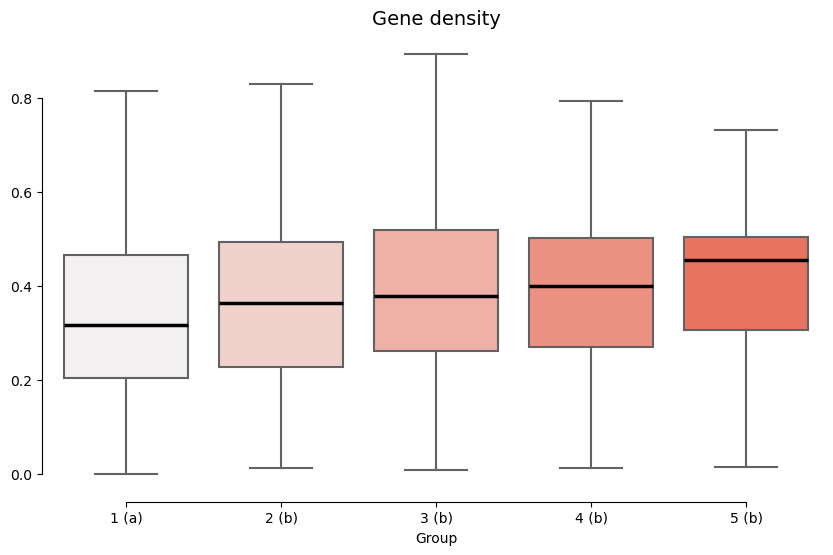

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "b",
    "4": "b",
    "5": "b"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"genes_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("Gene density", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/fig8B-1.pdf")

# Display the plot
plt.show()

### TE content

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_te_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.jb__fh_i.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.jb__fh_i.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.5e02vmaq.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.5e02vmaq.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.d3n_v9d4.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-46813626/pybedtools.d3n_v9d4.tmp has a record wh

In [1]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (te_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (te_x.bed files).
P-value for te_1 vs. te_2: 0.0031
P-value for te_1 vs. te_3: 0.0000
P-value for te_1 vs. te_4: 0.0000
P-value for te_1 vs. te_5: 0.0002
P-value for te_2 vs. te_3: 0.0014
P-value for te_2 vs. te_4: 0.0203
P-value for te_2 vs. te_5: 0.0095
P-value for te_3 vs. te_4: 0.8537
P-value for te_3 vs. te_5: 0.2166
P-value for te_4 vs. te_5: 0.2429
Adjusted P-values and Significance Groups for Pairwise Comparisons:
te_1 vs. te_3: Adjusted P-Value=0.0000, Significance Group=a
te_1 vs. te_4: Adjusted P-Value=0.0001, Significance Group=a
te_1 vs. te_5: Adjusted P-Value=0.0007, Significance Group=a
te_2 vs. te_2: Adjusted P-Value=0.0036, Significance Group=a
te_1 vs. te_2: Adjusted P-Value=0.0063, Significance Group=a
te_2 vs. te_4: Adjusted P-Value=0.0158, Significance Group=a
te_2 vs. te_3: Adjusted P-Value=0.0290, Significance Group=a
te_3 vs. te_2: Adjusted P-Value=0.2699, Significance Group=a
te_3 vs. te_3: Adjusted P-Value=0

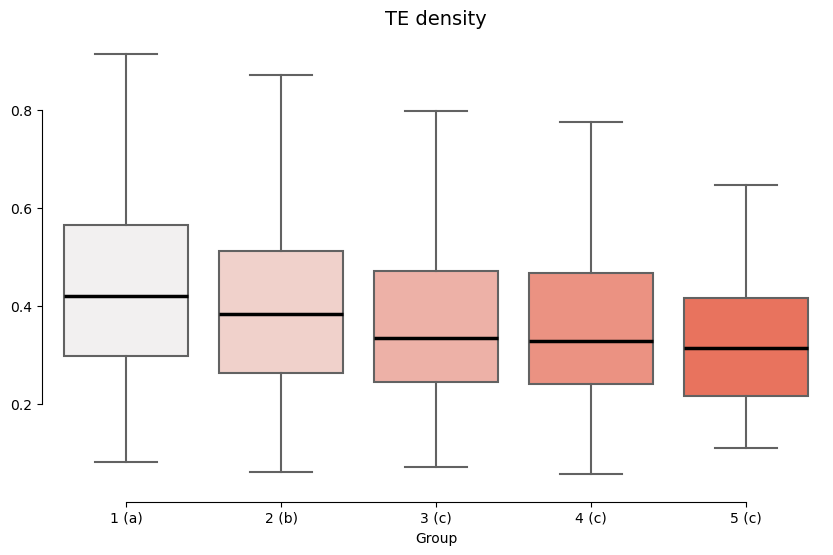

In [14]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"te_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("TE density", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/fig8B-2.pdf")

# Display the plot
plt.show()

### H3K18ac

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K18ac.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"H3K18ac_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42183951/pybedtools.imzq35zx.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.imzq35zx.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.mqo_gisx.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.mqo_gisx.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.2nuibqi9.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42183951/pybedtools.2nuibqi9.tmp has a record wh

In [9]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")
else:
    print("There are no significant differences between the groups")

There are no significant differences between the groups


### H3K27ac

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27ac.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42183951/pybedtools.ffg4zbvo.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.ffg4zbvo.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.0ija7gi8.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.0ija7gi8.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.3p539zmd.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42183951/pybedtools.3p539zmd.tmp has a record wh

In [1]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")
else:
    print("There are no significant differences between the groups")

There is a significant difference between the groups
P-value for te_1 vs. te_2: 0.0774
P-value for te_1 vs. te_3: 0.0128
P-value for te_1 vs. te_4: 0.2007
P-value for te_1 vs. te_5: 0.0074
P-value for te_2 vs. te_3: 0.2769
P-value for te_2 vs. te_4: 0.9303
P-value for te_2 vs. te_5: 0.0418
P-value for te_3 vs. te_4: 0.4942
P-value for te_3 vs. te_5: 0.1479
P-value for te_4 vs. te_5: 0.0903
Adjusted P-values and Significance Groups for Pairwise Comparisons:
te_1 vs. te_3: Adjusted P-Value=0.0639, Significance Group=a
te_1 vs. te_5: Adjusted P-Value=0.0639, Significance Group=b
te_2 vs. te_4: Adjusted P-Value=0.1394, Significance Group=c
te_1 vs. te_2: Adjusted P-Value=0.1806, Significance Group=d
te_3 vs. te_3: Adjusted P-Value=0.1806, Significance Group=e
te_3 vs. te_2: Adjusted P-Value=0.2465, Significance Group=f
te_1 vs. te_4: Adjusted P-Value=0.2867, Significance Group=g
te_2 vs. te_2: Adjusted P-Value=0.3461, Significance Group=h
te_2 vs. te_5: Adjusted P-Value=0.5492, Significanc

### H3K27me3

In [ ]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K27me3.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42183951/pybedtools.wud5_jzw.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.wud5_jzw.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.j4anpayk.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.j4anpayk.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.8s17uef7.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42183951/pybedtools.8s17uef7.tmp has a record wh

In [1]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")
else:
    print("There are no significant differences between the groups")

There are no significant differences between the groups


### H3K4me3

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/H3K4me3.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"H3K4me3_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.2_zztvgi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.2_zztvgi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.6yw_y6ls.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.6yw_y6ls.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.70462iah.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-46813626/pybedtools.70462iah.tmp has a record wh

In [4]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"H3K4me3_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_H3K4me3_per_tad"])
    data[f"H3K4me3_{x}"] = df["mean_H3K4me3_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["H3K4me3_1"], data["H3K4me3_2"], data["H3K4me3_3"], data["H3K4me3_4"], data["H3K4me3_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"H3K4me3_{i+1}"
            group2_name = f"H3K4me3_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"H3K4me3_{idx // 4 + 1} vs. H3K4me3_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"H3K4me3_{idx // 4 + 1} vs. H3K4me3_{idx % 4 + 2}"
        group1_name = f"H3K4me3_{idx // 4 + 1}"
        group2_name = f"H3K4me3_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")
else:
    print("There are no significant differences between the groups")

There is a significant difference between the groups
P-value for H3K4me3_1 vs. H3K4me3_2: 0.1070
P-value for H3K4me3_1 vs. H3K4me3_3: 0.0018
P-value for H3K4me3_1 vs. H3K4me3_4: 0.0011
P-value for H3K4me3_1 vs. H3K4me3_5: 0.0131
P-value for H3K4me3_2 vs. H3K4me3_3: 0.0612
P-value for H3K4me3_2 vs. H3K4me3_4: 0.0252
P-value for H3K4me3_2 vs. H3K4me3_5: 0.0594
P-value for H3K4me3_3 vs. H3K4me3_4: 0.4732
P-value for H3K4me3_3 vs. H3K4me3_5: 0.3208
P-value for H3K4me3_4 vs. H3K4me3_5: 0.6601
Adjusted P-values and Significance Groups for Pairwise Comparisons:
H3K4me3_1 vs. H3K4me3_3: Adjusted P-Value=0.0088, Significance Group=a
H3K4me3_1 vs. H3K4me3_4: Adjusted P-Value=0.0088, Significance Group=a
H3K4me3_1 vs. H3K4me3_5: Adjusted P-Value=0.0435, Significance Group=a
H3K4me3_2 vs. H3K4me3_3: Adjusted P-Value=0.0630, Significance Group=a
H3K4me3_2 vs. H3K4me3_2: Adjusted P-Value=0.1020, Significance Group=b
H3K4me3_2 vs. H3K4me3_4: Adjusted P-Value=0.1020, Significance Group=c
H3K4me3_1 vs.

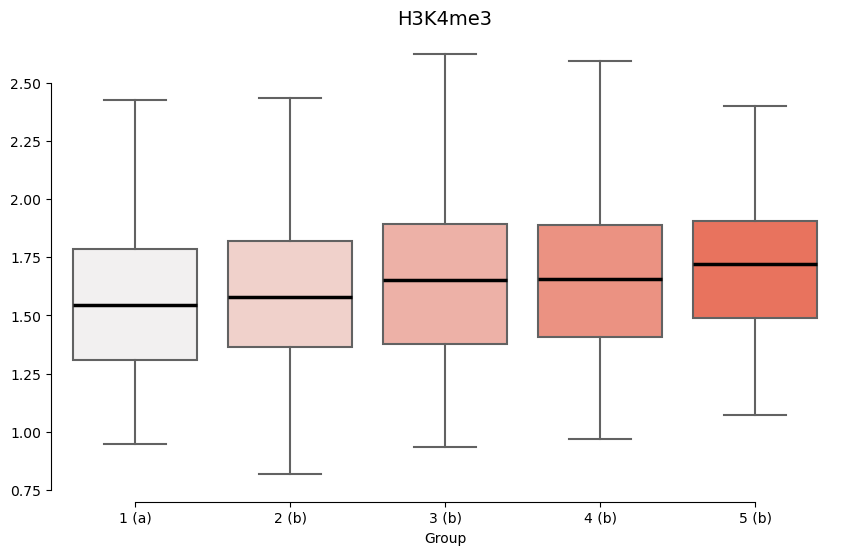

In [6]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "b",
    "4": "b",
    "5": "b"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"H3K4me3_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("H3K4me3", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/fig8B-3.pdf")

# Display the plot
plt.show()

### DNA methylation

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/methylation_from_zoe.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42183951/pybedtools.y7wjfvgi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.y7wjfvgi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.4qjw6g_y.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.4qjw6g_y.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.nu_msvf3.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42183951/pybedtools.nu_msvf3.tmp has a record wh

In [1]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (te_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (te_x.bed files).
P-value for te_1 vs. te_2: 0.2818
P-value for te_1 vs. te_3: 0.0133
P-value for te_1 vs. te_4: 0.0069
P-value for te_1 vs. te_5: 0.0299
P-value for te_2 vs. te_3: 0.1041
P-value for te_2 vs. te_4: 0.0439
P-value for te_2 vs. te_5: 0.0623
P-value for te_3 vs. te_4: 0.5052
P-value for te_3 vs. te_5: 0.2795
P-value for te_4 vs. te_5: 0.5044
Adjusted P-values and Significance Groups for Pairwise Comparisons:
te_1 vs. te_3: Adjusted P-Value=0.0666, Significance Group=a
te_1 vs. te_4: Adjusted P-Value=0.0666, Significance Group=b
te_1 vs. te_5: Adjusted P-Value=0.0995, Significance Group=c
te_2 vs. te_3: Adjusted P-Value=0.1097, Significance Group=d
te_2 vs. te_4: Adjusted P-Value=0.1247, Significance Group=e
te_2 vs. te_2: Adjusted P-Value=0.1734, Significance Group=f
te_1 vs. te_2: Adjusted P-Value=0.3522, Significance Group=g
te_3 vs. te_2: Adjusted P-Value=0.3522, Significance Group=h
te_2 vs. te_5: Adjusted P-Value=0

### PhastCons

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/PhastCons8wayChrAll.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"phast_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.b4gidqlj.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.b4gidqlj.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.690g2t18.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.690g2t18.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.a2bxxi3g.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-46813626/pybedtools.a2bxxi3g.tmp has a record wh

In [4]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"phast_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"phast_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["phast_1"], data["phast_2"], data["phast_3"], data["phast_4"], data["phast_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (phast_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"phast_{i+1}"
            group2_name = f"phast_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"phast_{idx // 4 + 1} vs. phast_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"phast_{idx // 4 + 1} vs. phast_{idx % 4 + 2}"
        group1_name = f"phast_{idx // 4 + 1}"
        group2_name = f"phast_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (phast_x.bed files).
P-value for phast_1 vs. phast_2: 0.0008
P-value for phast_1 vs. phast_3: 0.0000
P-value for phast_1 vs. phast_4: 0.0000
P-value for phast_1 vs. phast_5: 0.0034
P-value for phast_2 vs. phast_3: 0.1010
P-value for phast_2 vs. phast_4: 0.0050
P-value for phast_2 vs. phast_5: 0.1509
P-value for phast_3 vs. phast_4: 0.0800
P-value for phast_3 vs. phast_5: 0.4367
P-value for phast_4 vs. phast_5: 0.7257
Adjusted P-values and Significance Groups for Pairwise Comparisons:
phast_1 vs. phast_4: Adjusted P-Value=0.0000, Significance Group=a
phast_1 vs. phast_3: Adjusted P-Value=0.0000, Significance Group=a
phast_1 vs. phast_2: Adjusted P-Value=0.0026, Significance Group=a
phast_1 vs. phast_5: Adjusted P-Value=0.0085, Significance Group=a
phast_2 vs. phast_3: Adjusted P-Value=0.0100, Significance Group=a
phast_2 vs. phast_5: Adjusted P-Value=0.1334, Significance Group=a
phast_2 vs. phast_2: Adjusted P-Value=0.1443, Significan

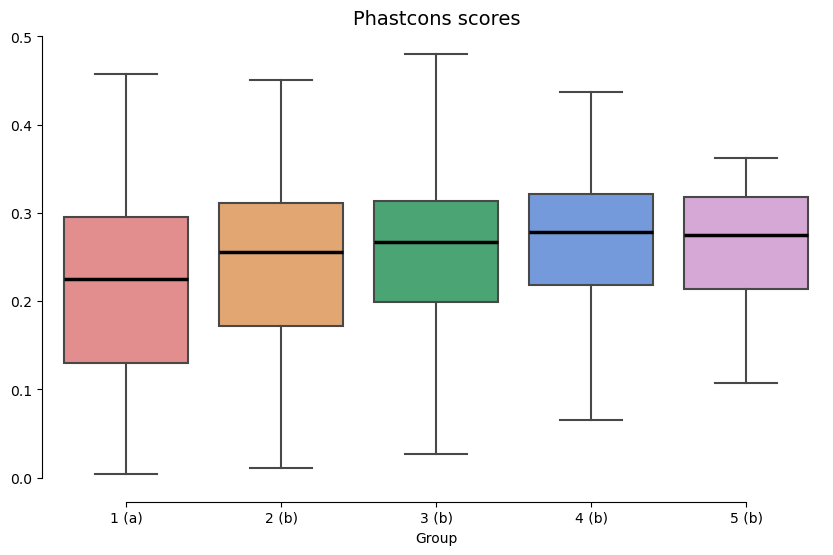

In [10]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "b",
    "4": "b",
    "5": "b"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"phast_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette(["lightcoral", "sandybrown", "mediumseagreen", "cornflowerblue", "plum"])

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("Phastcons scores", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/figS6.pdf")

# Display the plot
plt.show()

### Rho

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/rho.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"rho_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.qql9q4rh.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.qql9q4rh.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.d1_vtys9.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.d1_vtys9.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.nily22yz.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-46813626/pybedtools.nily22yz.tmp has a record wh

In [1]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"rho_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"rho_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["rho_1"], data["rho_2"], data["rho_3"], data["rho_4"], data["rho_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (te_x.bed files).")

    # Initialize p_values list before the loop
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):  # Exclude self-comparisons
            group1_name = f"rho_{i+1}"
            group2_name = f"rho_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]
    
    
    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"rho_{idx // 4 + 1} vs. rho_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
    
    # Update the current_group only if adjusted_p is less than 0.05
        if adjusted_p < 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"rho_{idx // 4 + 1} vs. rho_{idx % 4 + 2}"
        group1_name = f"rho_{idx // 4 + 1}"
        group2_name = f"rho_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (te_x.bed files).
P-value for rho_1 vs. rho_2: 0.0015
P-value for rho_1 vs. rho_3: 0.0000
P-value for rho_1 vs. rho_4: 0.0000
P-value for rho_1 vs. rho_5: 0.0003
P-value for rho_2 vs. rho_3: 0.0081
P-value for rho_2 vs. rho_4: 0.0148
P-value for rho_2 vs. rho_5: 0.0203
P-value for rho_3 vs. rho_4: 0.5693
P-value for rho_3 vs. rho_5: 0.2194
P-value for rho_4 vs. rho_5: 0.4337
Adjusted P-values and Significance Groups for Pairwise Comparisons:
rho_1 vs. rho_3: Adjusted P-Value=0.0000, Significance Group=a
rho_1 vs. rho_4: Adjusted P-Value=0.0000, Significance Group=b
rho_1 vs. rho_5: Adjusted P-Value=0.0010, Significance Group=c
rho_1 vs. rho_2: Adjusted P-Value=0.0038, Significance Group=d
rho_2 vs. rho_2: Adjusted P-Value=0.0162, Significance Group=e
rho_2 vs. rho_3: Adjusted P-Value=0.0246, Significance Group=f
rho_2 vs. rho_4: Adjusted P-Value=0.0289, Significance Group=g
rho_3 vs. rho_2: Adjusted P-Value=0.2742, Significance Group

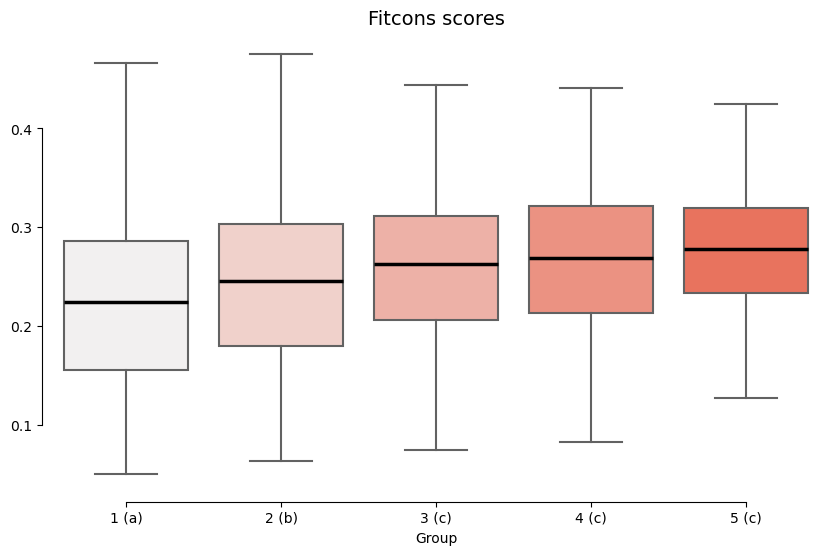

In [10]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"rho_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("Fitcons scores", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/fig8B-4.pdf")

# Display the plot
plt.show()

### PRO-seq

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "/scratch/ak8725/az_mrg/fitcons/from_zoe/PRO-seq.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42183951/pybedtools.zm9mha6d.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.zm9mha6d.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42183951/pybedtools.cw9k6o2q.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.cw9k6o2q.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42183951/pybedtools.i8wdo_f3.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42183951/pybedtools.i8wdo_f3.tmp has a record wh

In [5]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_te_per_tad"])
    data[f"te_{x}"] = df["mean_te_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (te_x.bed files).")

    # Initialize p_values list before the loop
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):  # Exclude self-comparisons
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]
    
    
    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
    
    # Update the current_group only if adjusted_p is less than 0.05
        if adjusted_p < 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")
else:
    print("There are no significant differences between the groups")

There are no significant differences between the groups


### SNP content

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_snp_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"snp_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42141234/pybedtools.5nruxecu.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.5nruxecu.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.qf726pac.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.qf726pac.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.gtn7732e.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42141234/pybedtools.gtn7732e.tmp has a record wh

In [2]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"snp_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_snp_per_tad"])
    data[f"snp_{x}"] = df["mean_snp_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["snp_1"], data["snp_2"], data["snp_3"], data["snp_4"], data["snp_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (snp_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"snp_{i+1}"
            group2_name = f"snp_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"snp_{idx // 4 + 1} vs. snp_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"snp_{idx // 4 + 1} vs. snp_{idx % 4 + 2}"
        group1_name = f"snp_{idx // 4 + 1}"
        group2_name = f"snp_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (snp_x.bed files).
P-value for snp_1 vs. snp_2: 0.0170
P-value for snp_1 vs. snp_3: 0.0000
P-value for snp_1 vs. snp_4: 0.0000
P-value for snp_1 vs. snp_5: 0.0993
P-value for snp_2 vs. snp_3: 0.0254
P-value for snp_2 vs. snp_4: 0.0035
P-value for snp_2 vs. snp_5: 0.6197
P-value for snp_3 vs. snp_4: 0.2073
P-value for snp_3 vs. snp_5: 0.6461
P-value for snp_4 vs. snp_5: 0.2537
Adjusted P-values and Significance Groups for Pairwise Comparisons:
snp_1 vs. snp_4: Adjusted P-Value=0.0001, Significance Group=a
snp_1 vs. snp_3: Adjusted P-Value=0.0001, Significance Group=a
snp_2 vs. snp_3: Adjusted P-Value=0.0116, Significance Group=a
snp_1 vs. snp_2: Adjusted P-Value=0.0425, Significance Group=a
snp_2 vs. snp_2: Adjusted P-Value=0.0509, Significance Group=a
snp_1 vs. snp_5: Adjusted P-Value=0.1656, Significance Group=b
snp_2 vs. snp_5: Adjusted P-Value=0.2962, Significance Group=c
snp_3 vs. snp_3: Adjusted P-Value=0.3171, Significance Grou

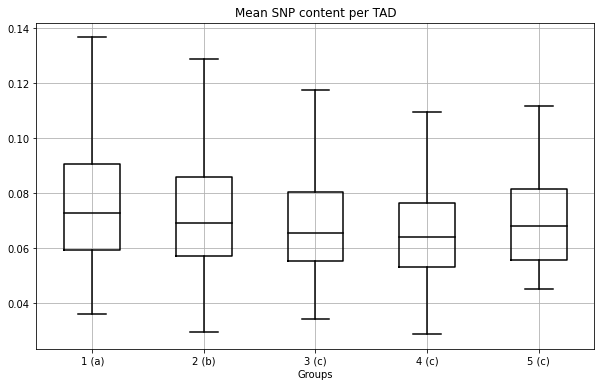

In [3]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"snp_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_snp"])
    data[f"{group}"] = df["mean_snp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Plot boxplots with group labels
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=1.5, color="black")
medianprops = dict(linewidth=1.5, color="black")
capprops = dict(linewidth=1.5, color="black")
whiskerprops = dict(linewidth=1.5, color="black")

bp = df.boxplot(column=[f"{i}" for i in range(1, 6)], showfliers=False,
                boxprops=boxprops, medianprops=medianprops,
                capprops=capprops, whiskerprops=whiskerprops)

# Set the x-axis tick labels
plt.xticks(range(1, len(df.columns) + 1), group_labels)

plt.xlabel("Groups")
plt.title("Mean SNP content per TAD")
plt.savefig("snp_groups.png", dpi=300)

plt.show()

# Identifying TADs conserved in all 5 genomes
Using /blast/Method_4/npb_x_conserved.txt files<br>
NPB coordinates<br>
61 TADs

In [7]:
#identify tads conserved in all 5 genomes = conserved_TADs.txt
import csv
import re
import os

def extract_number(string):
    # Extract the number from the string using regular expression
    match = re.search(r'\d+', string)
    return int(match.group()) if match else 0

def find_common_strings(files):
    common_strings = set()

    # Iterate through each file
    for file_path in files:
        current_strings = set()

        # Read the current file and extract unique strings from col1
        with open(file_path, 'r', newline='') as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                current_strings.add(row[0])

        # If this is the first file, initialize common_strings
        if not common_strings:
            common_strings = current_strings
        else:
            # Find the intersection of current_strings and common_strings
            common_strings = common_strings.intersection(current_strings)

    return sorted(common_strings, key=extract_number, reverse=False)

def save_common_strings(common_strings, output_file):
    # Write the common strings to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        for common_string in common_strings:
            writer.writerow([common_string])

# List of input files
input_files = ['npb_az_conserved.txt', 'npb_ir64_conserved.txt', 'npb_oruf_conserved.txt', 'npb_omer_conserved.txt']

# Specify the output file
output_file = 'conserved_TADs.txt'

# Find common strings
common_strings = find_common_strings(input_files)

# Save common strings to the output file
save_common_strings(common_strings, output_file)

#convert coordinates from txt to .bed
def split_and_save_to_bed(input_file, output_file):
    # Read the input file and split each row into columns
    with open(input_file, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        rows = [row for row in reader]

    # Split each row into columns and save to BED format
    bed_rows = []
    for row in rows:
        chrom, positions = row[0].split(':')
        start, end = positions.split('-')
        bed_rows.append([chrom, start, end])

    # Write the BED rows to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerows(bed_rows)
        
    # Remove the input file
        os.remove(input_file)
        
# Specify the input and output files
input_file = 'conserved_TADs.txt'
output_file = 'conserved_tads.bed'

# Split and save to BED
split_and_save_to_bed(input_file, output_file)

### SV content

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_sv_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"sv_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42141234/pybedtools.l585nauf.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.l585nauf.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.rk9clv62.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.rk9clv62.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.yk96wq9a.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42141234/pybedtools.yk96wq9a.tmp has a record wh

In [2]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"sv_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_sv_per_tad"])
    data[f"sv_{x}"] = df["mean_sv_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["sv_1"], data["sv_2"], data["sv_3"], data["sv_4"], data["sv_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (sv_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"sv_{i+1}"
            group2_name = f"sv_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"sv_{idx // 4 + 1} vs. sv_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"sv_{idx // 4 + 1} vs. sv_{idx % 4 + 2}"
        group1_name = f"sv_{idx // 4 + 1}"
        group2_name = f"sv_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (sv_x.bed files).
P-value for sv_1 vs. sv_2: 0.0280
P-value for sv_1 vs. sv_3: 0.0100
P-value for sv_1 vs. sv_4: 0.0012
P-value for sv_1 vs. sv_5: 0.0885
P-value for sv_2 vs. sv_3: 0.5841
P-value for sv_2 vs. sv_4: 0.0773
P-value for sv_2 vs. sv_5: 0.4867
P-value for sv_3 vs. sv_4: 0.2065
P-value for sv_3 vs. sv_5: 0.6607
P-value for sv_4 vs. sv_5: 0.8016
Adjusted P-values and Significance Groups for Pairwise Comparisons:
sv_1 vs. sv_4: Adjusted P-Value=0.0117, Significance Group=a
sv_1 vs. sv_3: Adjusted P-Value=0.0502, Significance Group=a
sv_1 vs. sv_2: Adjusted P-Value=0.0935, Significance Group=b
sv_1 vs. sv_5: Adjusted P-Value=0.1770, Significance Group=c
sv_2 vs. sv_3: Adjusted P-Value=0.1770, Significance Group=d
sv_2 vs. sv_5: Adjusted P-Value=0.3442, Significance Group=e
sv_2 vs. sv_4: Adjusted P-Value=0.6953, Significance Group=f
sv_2 vs. sv_2: Adjusted P-Value=0.7301, Significance Group=g
sv_3 vs. sv_2: Adjusted P-Value=0

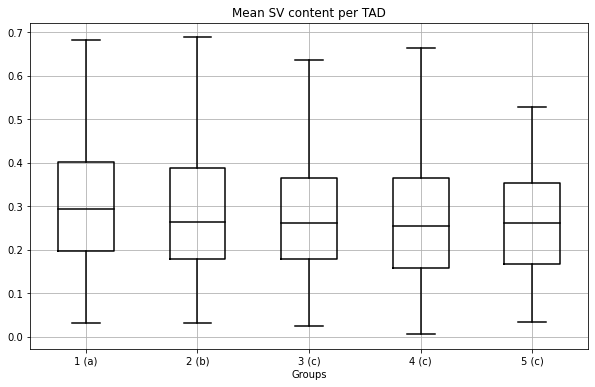

In [3]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"sv_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_sv"])
    data[f"{group}"] = df["mean_sv"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Plot boxplots with group labels
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=1.5, color="black")
medianprops = dict(linewidth=1.5, color="black")
capprops = dict(linewidth=1.5, color="black")
whiskerprops = dict(linewidth=1.5, color="black")

bp = df.boxplot(column=[f"{i}" for i in range(1, 6)], showfliers=False,
                boxprops=boxprops, medianprops=medianprops,
                capprops=capprops, whiskerprops=whiskerprops)

# Set the x-axis tick labels
plt.xticks(range(1, len(df.columns) + 1), group_labels)

plt.xlabel("Groups")
plt.title("Mean SV content per TAD")
plt.savefig("sv_groups.png", dpi=300)

plt.show()

### GC content

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/blast/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_GC_content_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"gc_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-42141234/pybedtools.e89y434k.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.e89y434k.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-42141234/pybedtools.o5txhth9.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.o5txhth9.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-42141234/pybedtools.gjxtfbzl.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	507500	567500

***** WARNING: File /state/partition1/job-42141234/pybedtools.gjxtfbzl.tmp has a record wh

In [8]:
import os
os.chdir('/scratch/ak8725/blast/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"gc_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_gc_per_tad"])
    data[f"gc_{x}"] = df["mean_gc_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["gc_1"], data["gc_2"], data["gc_3"], data["gc_4"], data["gc_5"])

if p_value > 0.05:
    print("There is no significant difference between the groups (gc_x.bed files).")
    
if p_value < 0.05:
    print("There is a significant difference between the groups (gc_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"gc_{i+1}"
            group2_name = f"gc_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"gc_{idx // 4 + 1} vs. gc_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"gc_{idx // 4 + 1} vs. sv_{idx % 4 + 2}"
        group1_name = f"gc_{idx // 4 + 1}"
        group2_name = f"gc_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is no significant difference between the groups (gc_x.bed files).


# Identifying TADs conserved in all 5 genomes
Using /blast/Method_4/npb_x_conserved.txt files<br>
NPB coordinates<br>
61 TADs

In [7]:
#identify tads conserved in all 5 genomes = conserved_TADs.txt
import csv
import re
import os

def extract_number(string):
    # Extract the number from the string using regular expression
    match = re.search(r'\d+', string)
    return int(match.group()) if match else 0

def find_common_strings(files):
    common_strings = set()

    # Iterate through each file
    for file_path in files:
        current_strings = set()

        # Read the current file and extract unique strings from col1
        with open(file_path, 'r', newline='') as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                current_strings.add(row[0])

        # If this is the first file, initialize common_strings
        if not common_strings:
            common_strings = current_strings
        else:
            # Find the intersection of current_strings and common_strings
            common_strings = common_strings.intersection(current_strings)

    return sorted(common_strings, key=extract_number, reverse=False)

def save_common_strings(common_strings, output_file):
    # Write the common strings to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        for common_string in common_strings:
            writer.writerow([common_string])

# List of input files
input_files = ['npb_az_conserved.txt', 'npb_ir64_conserved.txt', 'npb_oruf_conserved.txt', 'npb_omer_conserved.txt']

# Specify the output file
output_file = 'conserved_TADs.txt'

# Find common strings
common_strings = find_common_strings(input_files)

# Save common strings to the output file
save_common_strings(common_strings, output_file)

#convert coordinates from txt to .bed
def split_and_save_to_bed(input_file, output_file):
    # Read the input file and split each row into columns
    with open(input_file, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        rows = [row for row in reader]

    # Split each row into columns and save to BED format
    bed_rows = []
    for row in rows:
        chrom, positions = row[0].split(':')
        start, end = positions.split('-')
        bed_rows.append([chrom, start, end])

    # Write the BED rows to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerows(bed_rows)
        
    # Remove the input file
        os.remove(input_file)
        
# Specify the input and output files
input_file = 'conserved_TADs.txt'
output_file = 'conserved_tads.bed'

# Split and save to BED
split_and_save_to_bed(input_file, output_file)

# Identifying TADs conserved in domesticated rice genomes (npb, az, ir64)
Using /blast/Method_4/npb_x_conserved.txt files<br>
NPB coordinates<br>
107 TADs

In [10]:
#identify tads conserved in all 5 genomes = conserved_TADs.txt
import csv
import re
import os

def extract_number(string):
    # Extract the number from the string using regular expression
    match = re.search(r'\d+', string)
    return int(match.group()) if match else 0

def find_common_strings(files):
    common_strings = set()

    # Iterate through each file
    for file_path in files:
        current_strings = set()

        # Read the current file and extract unique strings from col1
        with open(file_path, 'r', newline='') as file:
            reader = csv.reader(file, delimiter='\t')
            for row in reader:
                current_strings.add(row[0])

        # If this is the first file, initialize common_strings
        if not common_strings:
            common_strings = current_strings
        else:
            # Find the intersection of current_strings and common_strings
            common_strings = common_strings.intersection(current_strings)

    return sorted(common_strings, key=extract_number, reverse=False)

def save_common_strings(common_strings, output_file):
    # Write the common strings to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        for common_string in common_strings:
            writer.writerow([common_string])

# List of input files
input_files = ['npb_az_conserved.txt', 'npb_ir64_conserved.txt']

# Specify the output file
output_file = 'domesticated_TADs.txt'

# Find common strings
common_strings = find_common_strings(input_files)

# Save common strings to the output file
save_common_strings(common_strings, output_file)

#convert coordinates from txt to .bed
def split_and_save_to_bed(input_file, output_file):
    # Read the input file and split each row into columns
    with open(input_file, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        rows = [row for row in reader]

    # Split each row into columns and save to BED format
    bed_rows = []
    for row in rows:
        chrom, positions = row[0].split(':')
        start, end = positions.split('-')
        bed_rows.append([chrom, start, end])

    # Write the BED rows to the output file
    with open(output_file, 'w', newline='') as file:
        writer = csv.writer(file, delimiter='\t')
        writer.writerows(bed_rows)
        
    # Remove the input file
        #os.remove(input_file)

In [11]:
#remove tads that are found in oruf or omer
import os

def remove_conserved_tads(input_file, conserved_files):
    # Load the col1 strings from conserved files into a set
    conserved_strings = set()

    for conserved_file in conserved_files:
        with open(conserved_file, 'r') as file:
            for line in file:
                parts = line.strip().split('\t')
                col1_string = parts[0]
                conserved_strings.add(col1_string)

    # Read the content of domesticated_TADs.txt and filter lines
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Filter lines to keep only those whose col1 strings are not in conserved_strings
    filtered_lines = [line for line in lines if line.strip() not in conserved_strings]

    # Write the filtered lines back to domesticated_TADs.txt
    with open(input_file, 'w') as file:
        file.writelines(filtered_lines)

# Example usage
domesticated_file = 'domesticated_TADs.txt'
conserved_files = ['npb_omer_conserved.txt', 'npb_oruf_conserved.txt']

remove_conserved_tads(domesticated_file, conserved_files)

In [12]:
# Specify the input and output files
input_file = 'domesticated_TADs.txt'
output_file = 'domesticated_tads.bed'

# Split and save to BED
split_and_save_to_bed(input_file, output_file)

# Creating files with all split/merged TADs in Nipponbare across all comparisons for Sonia

In [5]:
# List of input files
input_files = ['npb_az_splits.txt', 'npb_ir64_splits.txt', 'npb_oruf_splits.txt', 'npb_omer_splits.txt']

# Set to store unique strings from col1
unique_strings = set()

# Iterate over each input file
for input_file in input_files:
    with open(input_file, 'r') as file:
        # Iterate over each line in the file
        for line in file:
            # Extract the string from col1
            col1_value = line.split('\t')[0]

            # Add the string to the set
            unique_strings.add(col1_value)

# Write unique strings to the output file
with open('split_tads.txt', 'w') as outfile:
    # Write each unique string to a new line
    for unique_string in unique_strings:
        outfile.write(unique_string + '\n')

In [6]:
# Read unique strings from merged_tads.txt
with open('split_tads.txt', 'r') as file:
    unique_strings = [line.strip() for line in file]

# Split each line and sort the data
parsed_data = [entry.split(':') for entry in unique_strings]
parsed_data.sort()

# Write the parsed data to merged_tads.bed
with open('split_tads.bed', 'w') as outfile:
    for entry in parsed_data:
        # Extract start and end values from the second part
        start, end = entry[1].split('-')
        
        # Write chr, start, end to the output file
        outfile.write('\t'.join([entry[0], start, end]) + '\n')